In [13]:
import numpy.ma as ma
import iris.coord_categorisation
import iris
import glob
import numpy as np
from numba import jit
import os
import geopandas as gpd
import time 
import sys
import iris.quickplot as qplt
import cartopy.crs as ccrs
import matplotlib 
import iris.plot as iplt
from scipy import spatial
import itertools
from shapely.geometry import Point, Polygon
from pyproj import Proj, transform
import matplotlib.pyplot as plt
import pandas as pd
# import tilemapbase
import matplotlib as mpl
from datetime import datetime  

In [20]:
resolution = '2.2km'
em = '01'
timeperiod = '1980_2001'
test= iris.load(f"/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/{resolution}/{timeperiod}/leeds-at-centre/{em}/leeds-at-centre.nc")
#f"ProcessedData/TimeSeries/UKCP18_hourly/{resolution}/{yrs_range}/leeds-at-centre/{em}/leeds-at-centre.npy"

In [15]:
################################################################
# Define variables and set up environment
################################################################
root_fp = "/nfs/a319/gy17m2a/PhD/"
os.chdir(root_fp)

# Create path to files containing functions
sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from PDF_plotting_functions import *
# sys.path.insert(0, root_fp + 'Scripts/Regridding')
# from Regridding_functions import *
sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from Spatial_geometry_functions import *
# Define ensemble member numbers
ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

# Define whether to filter out JJA
jja_status = 'jja'

In [27]:
leeds_data = np.load(f"ProcessedData/TimeSeries/UKCP18_hourly/2.2km/{timeperiod}/leeds-at-centre/{em}/leeds-at-centre.npy")

In [36]:
leeds_data[leeds_data > 0.1]

array([0.2978245 , 0.33826438, 4.43613338, ..., 1.79032218, 0.40136164,
       0.10825793])

In [18]:
################################################################
# Loop through ensemble members and load in data for whole of leeds 
################################################################
# Create a dictionary to store results
all_dict= {}

# Loop through ensemble members
ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']
for em in ems:
    for timeperiod in ['Baseline', 'Future_near', 'Future_far']:
        print(em)
        
        ################################################################
        # Load in timestamps that relate to one cell's worth of data
        #baseline_times_with_jjaflag = pd.read_csv(f"Outputs/TimeSeries/UKCP18_hourly/2.2km/{timeperiod}/leeds-at-centre/timestamps_jjaflag.csv")
        #baseline_times_with_jjaflag = pd.concat([baseline_times_with_jjaflag]* 1221)
        
        #if timeperiod == '1980_2001':
        #    times = baseline_times_with_jjaflag
        
        elif timeperiod ==  'Future_near' or timeperiod == 'Future_far':
            times = np.load(f'Outputs/TimeSeries/UKCP18_hourly/2.2km/{timeperiod}/leeds-at-centre/timestamps.npy')
            # Repeat this 1221 times to be the same length as the precip data for whole of Leeds 
            times = np.tile(times, 1221)   
            # Add JJA flag
            times = pd.DataFrame({'times':times,
                                'in_jja': baseline_times_with_jjaflag['in_jja']})
        
                
        # Load in 20 years of model data for the whole of leeds
        leeds_data = np.load(f"Outputs/TimeSeries/UKCP18_hourly/2.2km/{timeperiod}/leeds-at-centre/{em}/leeds-at-centre.npy")
       
        # Join to corresponding dates/times
        leeds_data_withtimes = pd.DataFrame({"Date" : times['times'], 
                                                 'Precipitation (mm/hr)':leeds_data,
                                                 'jja':times['in_jja']})
        # JJA?
        if jja_status == 'jja':
            leeds_data_withtimes = leeds_data_withtimes.dropna()
            
        # Add to dictionary
        all_dict['EM{}_{}'.format(em, timeperiod)] = leeds_data_withtimes    

01


FileNotFoundError: [Errno 2] No such file or directory: 'Outputs/TimeSeries/UKCP18_hourly/2.2km/Baseline/leeds-at-centre/timestamps_jjaflag.csv'

EM01_Baseline
EM01_Future_near
EM01_Future_far
EM04_Baseline
EM04_Future_near
EM04_Future_far
EM05_Baseline
EM05_Future_near
EM05_Future_far
EM06_Baseline
EM06_Future_near
EM06_Future_far
EM07_Baseline
EM07_Future_near
EM07_Future_far
EM08_Baseline
EM08_Future_near
EM08_Future_far
EM09_Baseline
EM09_Future_near
EM09_Future_far
EM10_Baseline
EM10_Future_near
EM10_Future_far
EM11_Baseline
EM11_Future_near
EM11_Future_far
EM12_Baseline
EM12_Future_near
EM12_Future_far
EM13_Baseline
EM13_Future_near
EM13_Future_far
EM15_Baseline
EM15_Future_near
EM15_Future_far


,BinCentres,EM01_Baseline,EM01_Future_near,EM01_Future_far,EM04_Baseline,EM04_Future_near,EM04_Future_far,EM05_Baseline,EM05_Future_near,EM05_Future_far,...,EM11_Future_far,EM12_Baseline,EM12_Future_near,EM12_Future_far,EM13_Baseline,EM13_Future_near,EM13_Future_far,EM15_Baseline,EM15_Future_near,EM15_Future_far
0,0.15,1907931,1765745,1418012,2048370,2068324,1574712,2019912,1867208,1587217,...,1311737,2250826,2251415,1873570,1644426,1144369,889942,1722629,1589319,1190505
1,0.35,753499,651111,498895,809805,785098,558316,803619,703819,566640,...,452489,872336,837025,655098,659711,423354,295795,707346,603347,437525
2,0.55,467957,385499,287198,514331,473288,326852,507312,424351,328102,...,260476,523962,490738,367497,409901,250903,163820,451455,364493,257696
3,0.75,338233,265666,194372,376573,329747,224575,366865,295896,222604,...,174483,367185,334128,243520,295382,172737,107164,331084,254993,176869
4,0.95,262452,198586,144594,292425,248152,169036,283618,223204,163201,...,129133,277948,245712,178183,225169,129239,77629,257783,194110,131820
5,1.15,210011,154093,112119,236570,194029,133319,228631,176285,125846,...,100355,219673,189179,137505,178506,101215,59318,208255,154229,103000
6,1.35,172168,123765,90214,195843,157545,108400,187690,142191,100863,...,81104,174791,150339,108777,144895,80614,47081,172325,125623,82172
7,1.65,268382,187587,137821,305058,241655,166995,286629,214761,151063,...,123148,252680,222412,161860,218261,122993,69434,267424,192393,123842
8,2.05,190797,135092,100508,224217,173060,121079,199015,154631,108570,...,89484,169397,154917,113085,153790,90401,49524,195541,138795,90905
9,2.55,194515,141728,106030,233392,182648,128701,200658,161089,115471,...,97244,161048,153012,114596,155668,96240,51785,206496,143332,97493


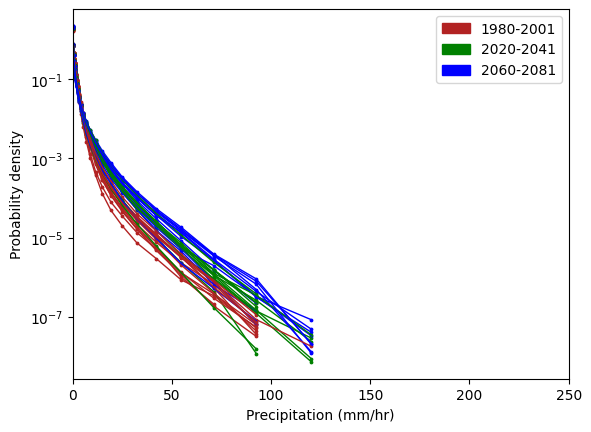

In [10]:
##############################################################################
##############################################################################
# Plotting - plot a line for each ensemble member
##############################################################################
##############################################################################
# Create dictionary to specify colours            
cols_dict = {} 
for timeperiod in ['Baseline', 'Future_near', 'Future_far']:
    for em in ems:
        if timeperiod == 'Baseline':
            cols_dict['EM' + em + '_' + timeperiod] = "firebrick"
        elif timeperiod == 'Future_near':        
            cols_dict['EM' + em + '_' + timeperiod] = 'green'
        elif timeperiod == 'Future_far':
            cols_dict['EM' + em + '_' + timeperiod] = 'blue'
    
# Create patches for creating legend
patches= []
patch = mpatches.Patch(color='firebrick', label='1980-2001')
patches.append(patch)
patch = mpatches.Patch(color='green', label='2020-2041')
patches.append(patch)
patch = mpatches.Patch(color='blue', label='2060-2081')
patches.append(patch)

# Define plotting parameters
x_axis = 'linear'
y_axis = 'log'
bin_nos = 30 #(10 gives 12, 30 gives 29, 45 gives 41 bins)
xlim = 250
bins_if_log_spaced= bin_nos

# plt.savefig("Scripts/UKCP18/PrecipitationPDFs/leeds-at-centre/Figs/BaselineVsFuture/AllEMs.png".format(jja_status))

EM01_Baseline
EM01_Future_near
EM01_Future_far
EM04_Baseline
EM04_Future_near
EM04_Future_far
EM05_Baseline
EM05_Future_near
EM05_Future_far
EM06_Baseline
EM06_Future_near
EM06_Future_far
EM07_Baseline
EM07_Future_near
EM07_Future_far
EM08_Baseline
EM08_Future_near
EM08_Future_far
EM09_Baseline
EM09_Future_near
EM09_Future_far
EM10_Baseline
EM10_Future_near
EM10_Future_far
EM11_Baseline
EM11_Future_near
EM11_Future_far
EM12_Baseline
EM12_Future_near
EM12_Future_far
EM13_Baseline
EM13_Future_near
EM13_Future_far
EM15_Baseline
EM15_Future_near
EM15_Future_far


,BinCentres,EM01_Baseline,EM01_Future_near,EM01_Future_far,EM04_Baseline,EM04_Future_near,EM04_Future_far,EM05_Baseline,EM05_Future_near,EM05_Future_far,...,EM11_Future_far,EM12_Baseline,EM12_Future_near,EM12_Future_far,EM13_Baseline,EM13_Future_near,EM13_Future_far,EM15_Baseline,EM15_Future_near,EM15_Future_far
0,0.15,1907931,1765745,1418012,2048370,2068324,1574712,2019912,1867208,1587217,...,1311737,2250826,2251415,1873570,1644426,1144369,889942,1722629,1589319,1190505
1,0.35,753499,651111,498895,809805,785098,558316,803619,703819,566640,...,452489,872336,837025,655098,659711,423354,295795,707346,603347,437525
2,0.55,467957,385499,287198,514331,473288,326852,507312,424351,328102,...,260476,523962,490738,367497,409901,250903,163820,451455,364493,257696
3,0.75,338233,265666,194372,376573,329747,224575,366865,295896,222604,...,174483,367185,334128,243520,295382,172737,107164,331084,254993,176869
4,0.95,262452,198586,144594,292425,248152,169036,283618,223204,163201,...,129133,277948,245712,178183,225169,129239,77629,257783,194110,131820
5,1.15,210011,154093,112119,236570,194029,133319,228631,176285,125846,...,100355,219673,189179,137505,178506,101215,59318,208255,154229,103000
6,1.35,172168,123765,90214,195843,157545,108400,187690,142191,100863,...,81104,174791,150339,108777,144895,80614,47081,172325,125623,82172
7,1.65,268382,187587,137821,305058,241655,166995,286629,214761,151063,...,123148,252680,222412,161860,218261,122993,69434,267424,192393,123842
8,2.05,190797,135092,100508,224217,173060,121079,199015,154631,108570,...,89484,169397,154917,113085,153790,90401,49524,195541,138795,90905
9,2.55,194515,141728,106030,233392,182648,128701,200658,161089,115471,...,97244,161048,153012,114596,155668,96240,51785,206496,143332,97493


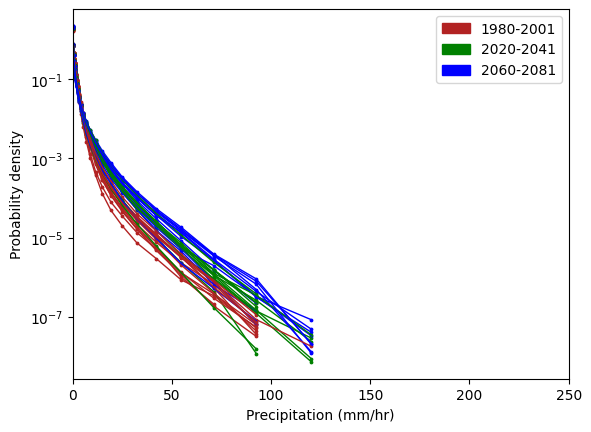

In [13]:
# Plot
log_discrete_histogram_lesslegend(all_dict, cols_dict, bin_nos, "Precipitation (mm/hr)", 
                                  patches, True, xlim, x_axis, y_axis) 

In [ ]:
# ##########################################################################
# # Percentile plots
# ##########################################################################
keys = []
p_99_9999,  = []
p_99_999 = []
p_99_99 = []
p_99_95 = []
p_99_9 = []
p_99_5 = []
p_99 = []
p_95 =[]
p_90 = []
p_80 = []
p_70 = []
p_60 = []
p_50 = []

for key, value in just_combined_dict.items():
    df = just_combined_dict[key]
    keys.append(key)
    p_99_9999.append(df['Precipitation (mm/hr)'].quantile(0.999999))
    p_99_999.append(df['Precipitation (mm/hr)'].quantile(0.99999))
    p_99_99.append(df['Precipitation (mm/hr)'].quantile(0.9999))
    p_99_95.append(df['Precipitation (mm/hr)'].quantile(0.9995))
    p_99_9.append(df['Precipitation (mm/hr)'].quantile(0.999))
    p_99_5.append(df['Precipitation (mm/hr)'].quantile(0.995))
    p_99.append(df['Precipitation (mm/hr)'].quantile(0.99))
    p_95.append(df['Precipitation (mm/hr)'].quantile(0.95))
    p_90.append(df['Precipitation (mm/hr)'].quantile(0.9))
    p_80.append(df['Precipitation (mm/hr)'].quantile(0.8))
    p_70.append(df['Precipitation (mm/hr)'].quantile(0.7))
    p_60.append(df['Precipitation (mm/hr)'].quantile(0.6))
    p_50.append(df['Precipitation (mm/hr)'].quantile(0.5))
    
    
df= pd.DataFrame({'Key':keys, '50': p_50,
                  '60': p_60, '70': p_70,  
                  '80': p_80, '90': p_90,
                  '95': p_95, '99': p_99,
                  '99.5': p_99_5, '99.9': p_99_9,
                '99.95': p_99_95, '99.99': p_99_99,
                '99.999': p_99_999, '99.9999': p_99_9999}) 


test = df.transpose()
test = test.rename(columns=test.iloc[0]).drop(test.index[0])

# Plot
firebrick_patch = mpatches.Patch(color='firebrick', label='Baseline')
green_patch = mpatches.Patch(color='green', label='Future (near)')
navy_patch = mpatches.Patch(color='navy', label='Future (far)')

for key, value in just_combined_dict.items():
    print(key)
    if key == 'Combined_ems_Baseline':
        filtered = test[key]
        filtered = filtered[5:]
        plt.plot(filtered, color = 'firebrick')
    elif key == 'Combined_ems_Future_near':
        filtered = test[key]
        filtered = filtered[5:]
        plt.plot(filtered, color = 'green')
    elif key == 'Combined_ems_Future_far':
        filtered = test[key]
        filtered = filtered[5:]
        plt.plot(filtered, color = 'navy')        
    plt.xlabel('Percentile')
    plt.ylabel('Precipitation (mm/hr)')
    plt.legend(handles=[firebrick_patch, green_patch, navy_patch])
    plt.yscale('linear')
    plt.xticks(rotation = 23)
# plt.savefig("Scripts/UKCP18/PrecipitationPDFs/leeds-at-centre/Figs/BaselineVsFuture/PercentilePlots.png".format(jja_status, bin_nos))

